# Riesgo por incumplimiento de pagos en créditos de vivienda
---------------------------------------------------------------------------------------------------------------------------

**Autor:** Cristhian David Tafur Hernández

**Asesor:** Raul Ramos


Notebook: 05 Ejecución del mejor modelo con el dataset ampliado

Objetivo de la Iteración:

Evaluar el desempeño del mejor modelo de clasificación identificado ahora usando el dataset con información ampliada (anexado 2 de las tablas complementarias) 


## Preparación de entorno de trabajo

In [ ]:
# Básicas
# ==============================================================================
import pandas as pd
import numpy as np

# Preporcesamiento de datos
# ==============================================================================
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# Elección de hiperparametros
# ==============================================================================
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn.model_selection import StratifiedKFold


# Modelamiento
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# Graficación
# ==============================================================================
import matplotlib.pyplot as plt
%matplotlib inline

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ruta_lectura ='/content/drive/MyDrive/Monografia/data_modelo/'

## 00. Lectura de datos procesados para los modelos

In [ ]:
# División estratificada (DATA AMPLIADA)
print('Distribución del target: Data train estratificada')

X_train = pd.read_csv (ruta_lectura + 'X_train_ampliada.csv', header=None)
y_train = pd.read_csv (ruta_lectura + 'y_train_ampliada.csv', header=None)
X_train = np.array(X_train)
y_train = np.array(y_train).reshape((-1))


X_test = pd.read_csv (ruta_lectura + 'X_test_ampliada.csv', header=None)
y_test = pd.read_csv (ruta_lectura + 'y_test_ampliada.csv', header=None)
X_test = np.array(X_test)
y_test = np.array(y_test).reshape((-1))

Distribución del target: Data train estratificada


In [ ]:
X_train.shape, X_test.shape

((246008, 441), (61503, 441))

## 01. Ejecución del modelo

In [ ]:
#definimos funciona para mostrar los resultados

def mostrar_resultados(y_test, x_test, model_fit, normalize = None):
    pred_y = model_fit.predict(x_test)
    disp = plot_confusion_matrix(model_fit, x_test, y_test,
                             cmap=plt.cm.Blues, 
                             normalize=normalize)
    
    disp.ax_.set_title('MC normalizada')
    plt.show()
    print ('--------------------------------------------------------------------')
    print (classification_report(y_test, pred_y))

In [ ]:
# Modelo RF con la mejor especificación probada
def run_rforest_balanced(X_train, y_train):
    rforest_b = RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                                      n_estimators=200, random_state=0) 
    
    rforest_b.fit(X_train, y_train)
    return rforest_b

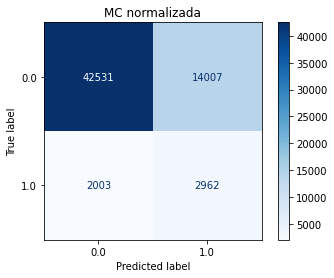

--------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.96      0.75      0.84     56538
         1.0       0.17      0.60      0.27      4965

    accuracy                           0.74     61503
   macro avg       0.56      0.67      0.56     61503
weighted avg       0.89      0.74      0.80     61503



In [ ]:
# Modelo RandomForest 1.1: RandomForest controlando el desbalance con el hiperparametro del algoritmo de clasificación
rforest = run_rforest_balanced(X_train, y_train)
mostrar_resultados(y_test, X_test, rforest)

# Conclusión de la iteración:

Al ejecutar el mejor modelo identificado con el dataset ampliado, se observa una mejora modesta en las métricas de validación de la clasificación de la clase "0", pero una desmejora marginal en el caso de la clase "1".